# Q2.1

1. Use `matplotlib` to show scatterplots of each variable

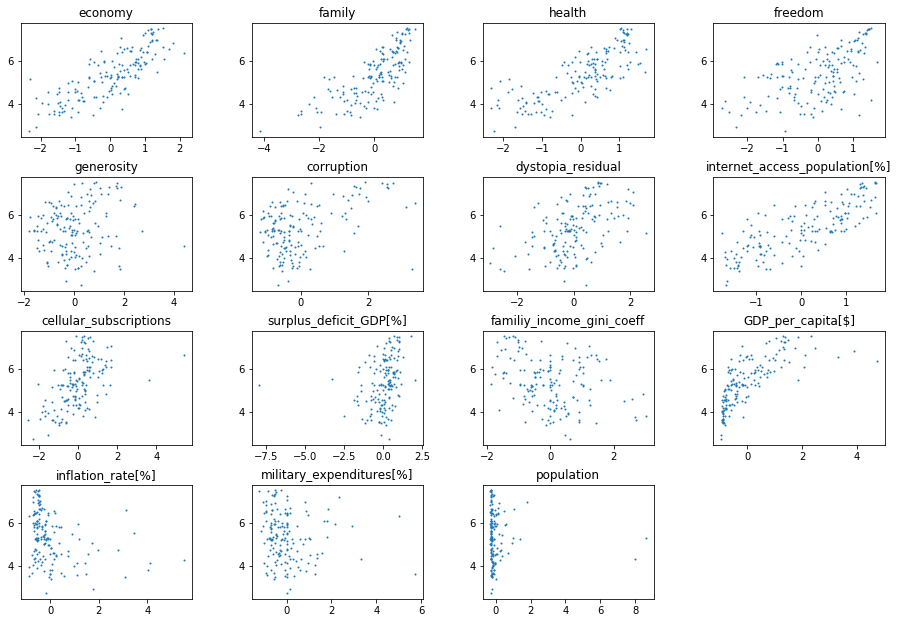

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# added
from sklearn.preprocessing import StandardScaler


data = pd.read_csv("happiness.csv")

# fill impossible data with NaN
data.loc[data['inflation_rate[%]'] > 100, 'inflation_rate[%]'] = np.nan

y = data.loc[:,'happiness_score']

data.drop(columns=['country', 'happiness_rank', 'map_reference', \
                   'biggest_official_language'], inplace=True)

# replace NaNs with column-mean
data.fillna(data.mean(), inplace=True);

scaler = StandardScaler().fit(data)
temp = scaler.transform(data)
data = pd.DataFrame(data=temp, index=data.index, columns=data.columns)

s = 1

%matplotlib inline
plt.subplot(4, 4, 1)
plt.scatter(data.loc[:,'economy'], y, s)
plt.title('economy')
plt.subplot(4, 4, 2)
plt.scatter(data.loc[:,'family'], y, s)
plt.title('family')
plt.subplot(4, 4, 3)
plt.scatter(data.loc[:,'health'], y, s)
plt.title('health')
plt.subplot(4, 4, 4)
plt.scatter(data.loc[:,'freedom'], y, s)
plt.title('freedom')
plt.subplot(4, 4, 5)
plt.scatter(data.loc[:,'generosity'], y, s)
plt.title('generosity')
plt.subplot(4, 4, 6)
plt.scatter(data.loc[:,'corruption'], y, s)
plt.title('corruption')
plt.subplot(4, 4, 7)
plt.scatter(data.loc[:,'dystopia_residual'], y, s)
plt.title('dystopia_residual')
plt.subplot(4, 4, 8)
plt.scatter(data.loc[:,'internet_access_population[%]'], y, s)
plt.title('internet_access_population[%]')
plt.subplot(4, 4, 9)
plt.scatter(data.loc[:,'cellular_subscriptions'], y, s)
plt.title('cellular_subscriptions')
plt.subplot(4, 4, 10)
plt.scatter(data.loc[:,'surplus_deficit_GDP[%]'], y, s)
#plt.xlim(plt.xlim()[0],100)
plt.title('surplus_deficit_GDP[%]')
plt.subplot(4, 4, 11)
plt.scatter(data.loc[:,'familiy_income_gini_coeff'], y, s)
plt.title('familiy_income_gini_coeff')
plt.subplot(4, 4, 12)
plt.scatter(data.loc[:,'GDP_per_capita[$]'], y, s)
plt.title('GDP_per_capita[$]')
plt.subplot(4, 4, 13)
plt.scatter(data.loc[:,'inflation_rate[%]'], y, s)
#plt.xlim(plt.xlim()[0],100)
plt.title('inflation_rate[%]')
plt.subplot(4, 4, 14)
plt.scatter(data.loc[:,'military_expenditures[%]'], y, s)
#plt.xlim(plt.xlim()[0],100)
plt.title('military_expenditures[%]')
plt.subplot(4, 4, 15)
plt.scatter(data.loc[:,'population'], y, s)
plt.title('population')

plt.subplots_adjust(top=2, bottom=0, left=0, right=2, hspace=0.35, wspace=0.35)

\setlength{\parindent}{0in}
After looking at the plots, I now present these out of the gut conclusions:
\begin{enumerate}\itemsep-.3em
    \item economy: positive linear correlation
    \item family: positive linear/quadratic correlation
    \item health: positive linear correlation
    \item freedom: linear / quadratic / cubic correlation
    \item generosity: weak quadratic correlation / no correlation
    \item corruption: quadratic correlation / no correlation
    \item dystopia residual: no correlation
    \item internet acces population $\left[ \% \right]$: positive linear correlation / cubic correlation
    \item cellular subscriptions: quadratic correlation
    \item surplus deficit GDP $\left[ \% \right]$: no correlation
    \item family income gini coeff: no correlation / weak negative linear correlation
    \item GDP per capital $\left[ \$ \right]$: quadratic correlation
    \item inflation rate $\left[ \% \right]$: no correlation
    \item military expenditures $\left[ \% \right]$: no correlation
    \item population: no correlation
\end{enumerate}
\newpage

# Q2.2

Load data and set up packages

In [2]:
from sklearn.kernel_ridge import KernelRidge
# not needed from the template
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RepeatedKFold

# added
from sklearn.model_selection import cross_val_score

Check the dataset for missing values and, if any are found, address them programmatically

In [3]:
# Unwanted columns were dropped, extreme outliers
# were replaced with NaNs and NaNs were eventually
# replaced by their column menas before plotting.




## Linear model

In [6]:


X = data.iloc[:, 1:len(data.columns)].copy();
y = data['happiness_score']

print("\n%-13sCorrcoef:"%(""))
for x in range(0,len(X.columns)):
    cc = np.ma.corrcoef(X.iloc[:,x], y)[1][0]
    print("%-30s: %.3f"% (X.columns[x], cc), end=" "),
    if (np.abs(cc) < 0.3):
        print("<- no correlation, factor will be dropped")
    else:
        print("")

#X.drop(columns=['generosity', 'surplus_deficit_GDP[%]', \
#                'military_expenditures[%]', 'population'], inplace=True)

def VIF_scores(K):
    cc = np.corrcoef(K, rowvar=False)
    VIF = np.linalg.inv(cc)
    print("\n%-16sVIF:"%(""))
    for x in range(0,len(K.columns)):
        print("%-30s: %.3f"%(K.columns[x], VIF.diagonal()[x]), end=" ")
        if (VIF.diagonal()[x] > 5):
            print("<- VIF too high")
        else:
            print("")

VIF_scores(X)
#X.drop(columns=[ 'internet_access_population[%]'], inplace=True)
#VIF_scores(X)

kr = KernelRidge(alpha=1e-7, kernel='linear', gamma=None, coef0=1, kernel_params=None)

print("\nR_sqrd:", kr.fit(X,y).score(X,y))

scores = cross_val_score(kr, X, y, cv=5)
print("\n5-fold cross validation (R_sqrd):\n", scores, scores.sum())


             Corrcoef:
economy                       : 0.812 
family                        : 0.753 
health                        : 0.782 
freedom                       : 0.570 
generosity                    : 0.155 <- no correlation, factor will be dropped
corruption                    : 0.429 
dystopia_residual             : 0.475 
internet_access_population[%] : 0.791 
cellular_subscriptions        : 0.508 
surplus_deficit_GDP[%]        : 0.282 <- no correlation, factor will be dropped
familiy_income_gini_coeff     : -0.303 
GDP_per_capita[$]             : 0.719 
inflation_rate[%]             : -0.329 
military_expenditures[%]      : -0.128 <- no correlation, factor will be dropped
population                    : -0.032 <- no correlation, factor will be dropped

                VIF:
economy                       : 11.978 <- VIF too high
family                        : 2.381 
health                        : 4.804 
freedom                       : 2.092 
generosity                   

\paragraph{Conclusion} At first, the Correlation Coefficients for each variable were calculated and factors, that do not correlate were tossed because they do not explain the happiness score very well.\newline

The variance inflation factor (VIF) was calculated to check for multicolinearity (i.e., to check if independent variables are correlated among each other). A VIF of 1 is good, a VIF between 5 and 10 indicates high correlation and might be a problem. From the first VIF computations (see the first VIF table above) 3 variables indicate too much correlation.\newline
Dropping the 'economy' factor with an VIF over 10 seems reasonable at first but is a bad idea, because it leads to siginficant drops in the cross validation eventually. This might be because the correlation for 'economy' is the strongest among all independent variables to the dependent variable. Dropping the 'internet access population' variable with a bad VIF leads to a better model (although, the 'economy' and 'GDP per capita' factors are still too high in the second VIF table above). Like the 'economy' variable, the 'internet access population' variable highly correlates with the happiness score, but does not impair the final results when being removed after the VIF check. I honestly have no idea why this is the case since the 'economy' and 'internet access population' plots are the most similar among all the plots.\newline

Model parameters: the best $\alpha = 1$ and $\gamma$ has no effect on the result.\newline

\textbf{References:}\newline

Strategies for optimizing the linear model:\newline
\url{https://www.youtube.com/watch?v=dQNpSa-bq4M&list=PLIeGtxpvyG-IqjoU8IiF0Yu1WtxNq_4z-&index=1}\newline

cross_val_score code:\newline
\url{https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html}\newline
VIF code:\newline
\url{https://stackoverflow.com/questions/42658379/variance-inflation-factor-in-python}\newline



## Quadratic model


In [5]:
X = data.iloc[:, 1:len(data.columns)].copy();
y = data['happiness_score']
#X = data.loc[:, ['economy', 'family', 'health', 'corruption', 'GDP_per_capita[$]']]

from scipy.stats import spearmanr

print("\n%-13sCorrcoef:"%(""))
for x in range(1,len(data.columns)):
    cc = spearmanr(data.iloc[:,x], y)
    print("%-30s: corr.: %.3f, p-value: %.2e"% (data.columns[x], cc[0], cc[1]), end=" "),
    if (np.abs(cc[0]) < 0.3):
        print("<- no correlation, factor will be dropped")
    else:
        print("")

#X.drop(columns=['generosity', 'familiy_income_gini_coeff', \
#                'military_expenditures[%]', 'population'], inplace=True)

        
kr = KernelRidge(alpha=1e-8, kernel='poly', gamma=1e-5, coef0=1, degree=2, kernel_params=None)

print("\nR_sqrd:", kr.fit(X,y).score(X,y))

scores = cross_val_score(kr, X, y, cv=5)
print("\n5-fold cross validation (R_sqrd):\n", scores, scores.sum())



             Corrcoef:
economy                       : corr.: 0.825, p-value: 9.36e-40 
family                        : corr.: 0.774, p-value: 4.00e-32 
health                        : corr.: 0.788, p-value: 5.37e-34 
freedom                       : corr.: 0.556, p-value: 5.81e-14 
generosity                    : corr.: 0.136, p-value: 9.05e-02 <- no correlation, factor will be dropped
corruption                    : corr.: 0.301, p-value: 1.42e-04 
dystopia_residual             : corr.: 0.504, p-value: 2.41e-11 
internet_access_population[%] : corr.: 0.792, p-value: 1.26e-34 
cellular_subscriptions        : corr.: 0.553, p-value: 8.50e-14 
surplus_deficit_GDP[%]        : corr.: 0.408, p-value: 1.33e-07 
familiy_income_gini_coeff     : corr.: -0.285, p-value: 3.30e-04 <- no correlation, factor will be dropped
GDP_per_capita[$]             : corr.: 0.827, p-value: 3.45e-40 
inflation_rate[%]             : corr.: -0.372, p-value: 1.85e-06 
military_expenditures[%]      : corr.: -0.196, 

{text results here}

## Gaussian model

{text results here}

## Comparison

{replace with your comparison paragraph/images}